# Sci-kit Learn Basics

## Prepocessing Data

### Import `preprocessing`

In [1]:
import numpy as np
from sklearn import preprocessing 

### Binarization

In [2]:
input_data = np.array([[5.1, -2.9, 3.3], 
                       [-1.2, 7.8, -6.1], 
                       [3.9, 0.4, 2.1], 
                       [7.3, -9.9, -4.5]]) 
# Binarize data  
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data) 
print("\nBinarized data:\n", data_binarized) 


Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


`preprocessing.Binarizer(threshold=2.1).transform(input_data)` passes all the elements in the array `input_data` into the function $$f(x) = \begin{cases} 1.0 \text{ if } x \geq 2.1 \\ 0.0 \text{ otherwise}  \end{cases}$$

### Normalization

In [3]:
input_data = np.array([[5.1, -2.9, 3.3], 
                       [-1.2, 7.8, -6.1], 
                       [3.9, 0.4, 2.1], 
                       [7.3, -9.9, -4.5]]) 
# Print mean and standard deviation 
print("\nBEFORE:") 
print("Mean =", input_data.mean(axis=0)) 
print("Std deviation =", input_data.std(axis=0)) 

print("\n Before Normalizaion: \n", input_data)

# Remove mean 
data_scaled = preprocessing.scale(input_data) 
print("\nAFTER:") 
print("Mean =", data_scaled.mean(axis=0)) 
print("Std deviation =", data_scaled.std(axis=0)) 

print("\nNormalized data: \n",data_scaled)


BEFORE:
Mean = [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]

 Before Normalizaion: 
 [[ 5.1 -2.9  3.3]
 [-1.2  7.8 -6.1]
 [ 3.9  0.4  2.1]
 [ 7.3 -9.9 -4.5]]

AFTER:
Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]

Normalized data: 
 [[ 0.42462551 -0.2748757   1.13244172]
 [-1.59434861  1.40579288 -1.18167831]
 [ 0.04005901  0.24346134  0.83702214]
 [ 1.12966409 -1.37437851 -0.78778554]]


In [4]:
## numpy equivalence
mean = np.mean(input_data, axis= 0)
sd = np.std(input_data, axis=0)

processed = (input_data - mean)/(sd)
print("Mean =", processed.mean(axis=0)) 
print("Std deviation =", processed.std(axis=0)) 
print("\nNormalized data: \n",processed)

Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]

Normalized data: 
 [[ 0.42462551 -0.2748757   1.13244172]
 [-1.59434861  1.40579288 -1.18167831]
 [ 0.04005901  0.24346134  0.83702214]
 [ 1.12966409 -1.37437851 -0.78778554]]


## Label encoding

### Import `preprocessing`

In [5]:
import numpy as np
from sklearn import preprocessing

### Define some sample labels

In [6]:
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white'] 

### Create the label encoder object and train it

In [7]:
# Create label encoder and fit the labels 
encoder = preprocessing.LabelEncoder() 
encoder.fit(input_labels) 

LabelEncoder()

### Print the mapping between words and numbers

In [8]:
# Print the mapping  
print("\nLabel mapping:") 
for i, item in enumerate(encoder.classes_): 
    print(item, '-->', i) 



Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


### Encode a set of randomly ordered labels to see how it performs

In [9]:
# Encode a set of labels using the encoder
test_labels = ["green", "red", "black"]
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", encoded_values)


Labels = ['green', 'red', 'black']
Encoded values = [1 2 0]


### Decode a random set of numbers

In [10]:
encoded_values = np.random.randint(0, 5, size=10)
print("\nLabels =", encoded_values)
print("Encode values =", encoder.inverse_transform(encoded_values))


Labels = [3 4 3 2 3 1 2 3 0 4]
Encode values = ['white' 'yellow' 'white' 'red' 'white' 'green' 'red' 'white' 'black'
 'yellow']


## Logistic Regression Classifier

*Logistic regression* is a technique that is used to explain the relationship between input variables and output variables. Here are some assumptions we will make about the classifier:
* input variables are assumed to be independent
* output variable is refered to as the dependent variable
* the dependent variable can take only a fixed set of values
* these values correspond to the classes of the classification problem

Our goal is to identify the relationship between the independent variables and the dependent variables by estimating the probabilities using a logistic function. This logistic function is a sigmoid curve $f(x) = \frac{1}{1+ e^{-x}}$ that's used to build the function with various parameters.

*Remark*: it is very closely related to generalized linear model analysis, where we try to fit a line  to a brunch of points to minimize the error. Instead of using linear regression, we use logistic regression. 

### Import all the required modules

In [11]:
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt 

### Define visualize_classifier()

In [12]:
def visualize_classifier(classifier, X, y, title = "default"): 
    # Define the minimum and maximum values for X and Y 
    # that will be used in the mesh grid 
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0 
    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01 
 
    # Define the mesh grid of X and Y values 
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size)) 

    # Run the classifier on the mesh grid 
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()]) 
 
    # Reshape the output array 
    output = output.reshape(x_vals.shape) 

    # Create a plot 
    plt.figure() 

    # Set the title
    plt.title(title)
 
    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray) 
 
    # Overlay the training points on the plot  
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot 
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max()) 
 
    # Specify the ticks on the X and Y axes 
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0))) 
 
    plt.show() 

### Define sample input data with two-dimensional vectors and corresponding lables

In [13]:
# Define sample input data 
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]]) 
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]) 

### Create the logistic regression classifier object

In [14]:
# Create the logistic regression classifier 
classifier = linear_model.LogisticRegression(solver='liblinear', C=100) 

### Train the classifier using the data

In [15]:
# Train the classifier 
classifier.fit(X, y) 

LogisticRegression(C=100, solver='liblinear')

### Visualize the performance of the classifier

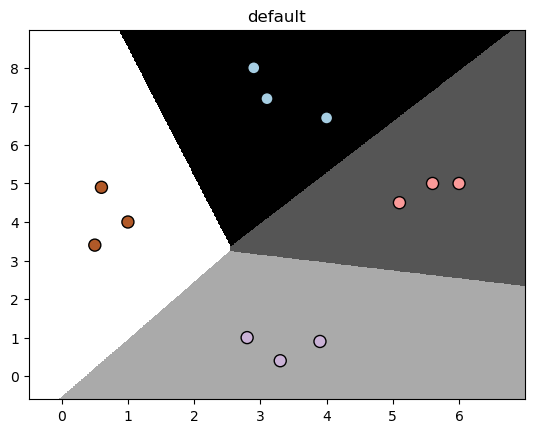

In [16]:
visualize_classifier(classifier, X, y)

### Effects of `C`

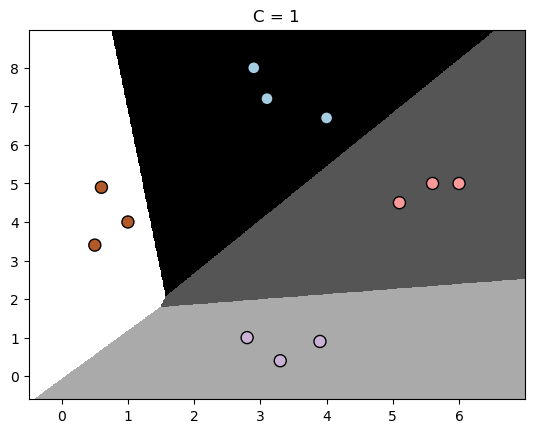

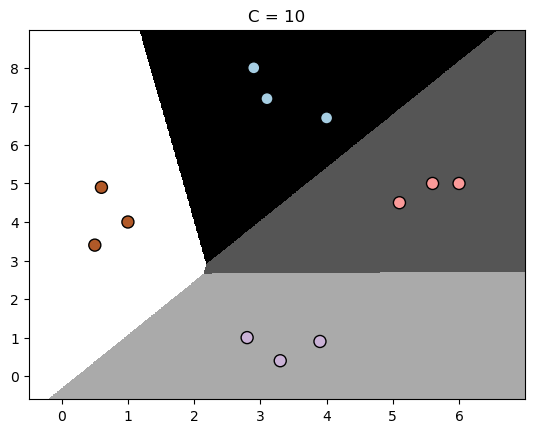

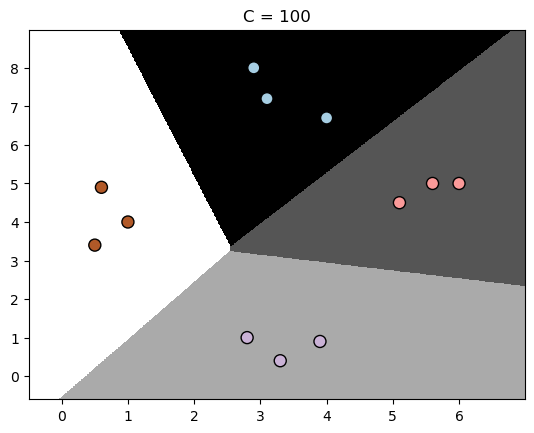

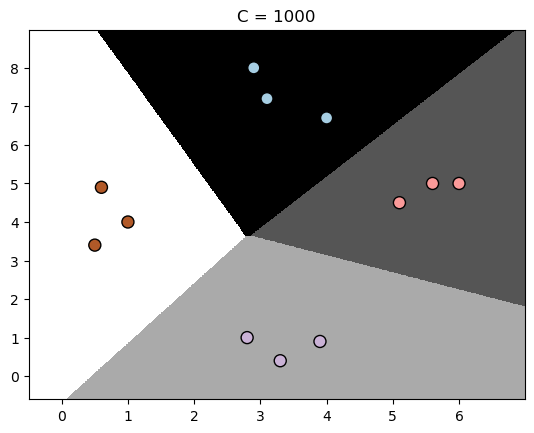

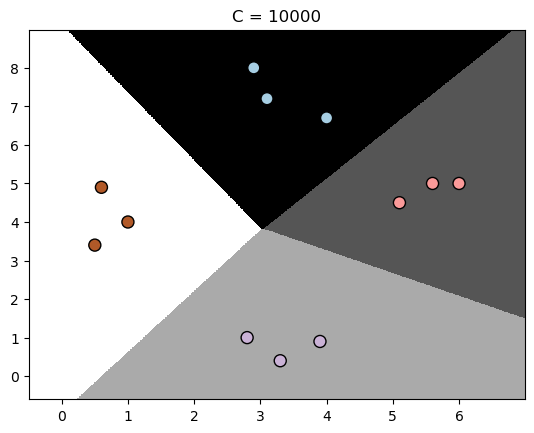

In [17]:
pow = np.arange(5)
C_values = 10**(pow)
for j in range(C_values.shape[0]):
     classifier = linear_model.LogisticRegression(solver='liblinear', C=C_values[j])
     classifier.fit(X, y) 
     visualize_classifier(classifier, X, y, "C = "+str(C_values[j]))

The parameter `C` imposes a certain penalty on the misclassification, so the algorithm customizes more to the training data. We should choose a suitable value for `C`. 
* If the value is too small, there will be an underfitting problem (very unaccurate classification). 
* If the value is too large, it will overfit to the training data and it won't generailize well.

## Naive Bayes Classifier

Naive Bayes is a technique used to build classifier using Bayes Theorem $$\mathbb{P}(A|B) \times \mathbb{P}(B) = \mathbb{P}(B|A) \times \mathbb{P}(A)$$. We build a Naive Bayes classifier by assigning class labels to problem instances. These problem instances are represented as vectors of features values. The naive assumptions here are that 
* the value of any give feature is independent of the value of any other feature, and
* all features are equally contributed to the result of classifications.

We define $B_1$, $B_2$, $B_3$, ... as the *Brief* and $E = (e_1, e_2, ..., e_d)$ as the *Evidence* . 
\begin{align*}
\mathbb{P}(B_k | E) &= \frac{\mathbb{P}(E | B_k)}{\mathbb{P}(E)}\\
&= \frac{\mathbb{P}(B_k )\mathbb{P}((e_1, e_2, ..., e_d) | B_{k})}{\sum_{j=1}^{n}\mathbb{P}(B_j )\mathbb{P}((e_1, e_2, ..., e_d) | B_{j})}\\
&= \frac{\mathbb{P}(B_k) \mathbb{P}(e_1 | B_k) \mathbb{P}(e_2 | B_k) \mathbb{P}(e_3 | B_k)... \mathbb{P}(e_d | B_k)}{\sum_{j=1}^{n}\mathbb{P}(B_j) \mathbb{P}(e_1 | B_j) \mathbb{P}(e_2 | B_j) \mathbb{P}(e_3 | B_j)... \mathbb{P}(e_d | B_j)}
\end{align*}
The last line of the equality is by the assumption of independence.

Notice that the denominator is not changing with $B_k$. Then, we can say $$B_{NB} = \arg \max_{B_k} \mathbb{P}(B_k) \mathbb{P}(e_1 | B_k) \mathbb{P}(e_2 | B_k) \mathbb{P}(e_3 | B_k)... \mathbb{P}(e_d | B_k)$$

### An Example: Titanic Survivors

#### Import all required Python Modules

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import mean_absolute_error

#### Load the Dateset from CSV File

In [19]:
dataframe = pd.read_csv("naive_bayes/titanic.csv")

## Drop the name colmun since the name doesn't affect whether the person survives or not.
dataframe = dataframe.drop(["Name"], axis=1) 

print(dataframe.describe()) ## show the statistics of the dataset
dataframe.head() ## have a preview of the dataset

         Survived      Pclass         Sex         Age  \
count  887.000000  887.000000  887.000000  887.000000   
mean     0.385569    2.305524    0.645998   29.471443   
std      0.487004    0.836662    0.478480   14.121908   
min      0.000000    1.000000    0.000000    0.420000   
25%      0.000000    2.000000    0.000000   20.250000   
50%      0.000000    3.000000    1.000000   28.000000   
75%      1.000000    3.000000    1.000000   38.000000   
max      1.000000    3.000000    1.000000   80.000000   

       Siblings/Spouses Aboard  Parents/Children Aboard       Fare  
count               887.000000               887.000000  887.00000  
mean                  0.525366                 0.383315   32.30542  
std                   1.104669                 0.807466   49.78204  
min                   0.000000                 0.000000    0.00000  
25%                   0.000000                 0.000000    7.92500  
50%                   0.000000                 0.000000   14.45420  
75%

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


#### Plot the data

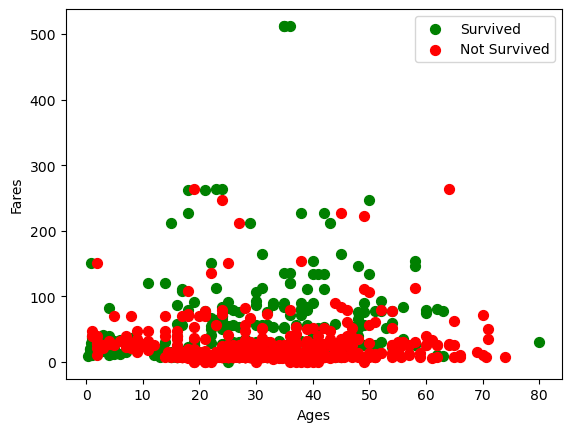

number of non-survivors = 545
number of survivors = 342
survival percentage = 38.56%


In [20]:
ages = dataframe["Age"].values
fares = dataframe["Fare"].values
survived = dataframe["Survived"].values

# Separate data based on survival status
survived_ages = ages[survived == 1]
survived_fares = fares[survived == 1]
not_survived_ages = ages[survived == 0]
not_survived_fares = fares[survived == 0]

# Plot survived data with green color and label
plt.scatter(survived_ages, survived_fares, s=50, color='green', label='Survived')

# Plot not survived data with red color and label
plt.scatter(not_survived_ages, not_survived_fares, s=50, color='red', label='Not Survived')

plt.xlabel("Ages")
plt.ylabel("Fares")
plt.legend()

plt.show()
print("number of non-survivors =", not_survived_ages.shape[0])
print("number of survivors =", survived_ages.shape[0])
print("survival percentage = "+str(round(survived_ages.shape[0]/(not_survived_ages.shape[0]+survived_ages.shape[0])*100, 2))+"%" )

From the plot above, we can have a rough observation on the relationship between survival, ages, and fares, e.g,
* the passengers who pay more are more likely to survive; and
* the younger passengers are more likely to survive.

#### Build a Naive Bayes Model

In [21]:
Features = dataframe.drop(["Survived"], axis =1).values
Targets = dataframe["Survived"].values

num_data =  Features.shape[0]
split_ratio = 0.9 ## can change the split train ratio here
num_train = int(num_data*split_ratio)

Features_Train, Targets_train = Features[:num_train], Targets[:num_train]
Features_test, Targets_test = Features[num_train:], Targets[num_train:]

## create a Naive Bayes model
model = GaussianNB()

## fit the data into the model
model.fit(Features_Train, Targets_train)


GaussianNB()

#### Use the model to do prediction

In [22]:
prediction = model.predict(Features_test)

#### Evaluate the model

In [23]:
print("Actual \t Prediction \t Correct?")
for x in zip(Targets_test, prediction):
     print( x[0], "\t", x[1], "\t\t", x[0] == x[1])

print("validation accuracy = "+ str(round(np.sum(prediction==Targets_test, axis=0)/(prediction.shape[0])*100, 2))+"%") ## By numpy
print("validation accuracy = "+ str(round(model.score(Features_test,Targets_test)*100,2))+"%") ## By sklearn module

Actual 	 Prediction 	 Correct?
1 	 1 		 True
1 	 0 		 False
1 	 0 		 False
0 	 0 		 True
0 	 0 		 True
0 	 1 		 False
0 	 0 		 True
1 	 1 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
0 	 1 		 False
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
1 	 1 		 True
1 	 0 		 False
0 	 0 		 True
1 	 1 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
1 	 0 		 False
1 	 0 		 False
1 	 1 		 True
1 	 1 		 True
1 	 0 		 False
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
1 	 1 		 True
0 	 0 		 True
0 	 0 		 True
1 	 0 		 False
1 	 0 		 False
0 	 0 		 True
0 	 0 		 True
1 	 1 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
1 	 1 		 True
0 	 0 		 True
0 	 0 		 True
0 	 1 		 False
1 	 1 		 True
0 	 1 		 False
1 	 1 		 True
1 	 1 		 True
1 	 0 		 False
1 	 1 		 True
0 	 0 		 True
0 	 0 		 True
0 	 0 		 True
1 	 1 		 True
0 	 0 		 True
0 	 0 		 True
1 	 1 		 True
1 	 1 		 True
0 	 0 		 True
0 	 0 		 True
1 	 0 		 False
0 	

## Confusion Matrix

A confusion matrix is used to describe the performance of a classifier. It is usually extracted from a test dataset for which the ground truth is known (e.g., in above example, we split the dataset into training dataset and testing dataset). We compare each class with every other class and see how many samples are misclassified.

* True Positive (TP): Prediction = 1, Ground Truth = 1
* True Negative (TN): Prediction = 0, Ground Truth = 0
* False Positive (FP): Prediction = 1, Ground Truth = 0 *(type I error)*
* False Negative (FN): Prediction = 0, Ground Truth = 1 *(type II error)*

### Import all the required modules

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

### Define some samples labels for the ground truth and the predicted output, and create the confusion matrix

In [28]:
# Define sample labels 
true_labels = [2, 0, 0, 2, 4, 4, 1, 0, 3, 3, 3] 
pred_labels = [2, 1, 0, 2, 4, 3, 1, 0, 1, 3, 3] 

# Create confusion matrix 
confusion_mat = confusion_matrix(true_labels, pred_labels) 

### Visualize the confusion matrix

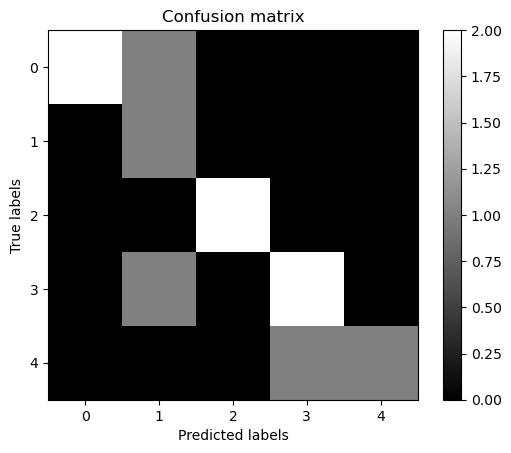

In [29]:
# Visualize confusion matrix 
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray) 
plt.title('Confusion matrix') 
plt.colorbar() 
ticks = np.arange(5) ## there is five distinct labels: 0, 1, 2, 3, 4
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks) 
plt.ylabel('True labels') 
plt.xlabel('Predicted labels') 
plt.show() 

### Classification Report

In [43]:
targets = []
for i in range(np.bincount(true_labels).shape[0]):
     targets.append("Class-"+str(i))
print(classification_report(true_labels, pred_labels, target_names=targets))

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.33      1.00      0.50         1
     Class-2       1.00      1.00      1.00         2
     Class-3       0.67      0.67      0.67         3
     Class-4       1.00      0.50      0.67         2

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11



### An Example: confusion matrix for the Titanic Survivors

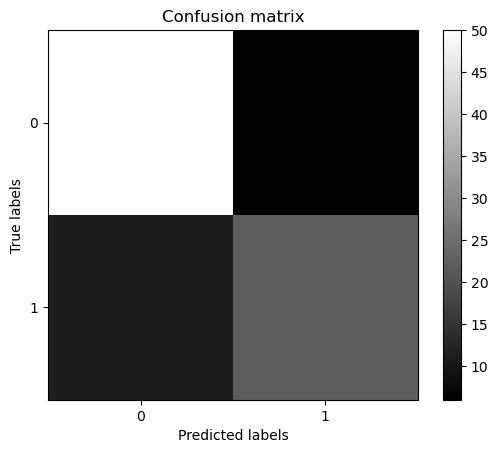

              precision    recall  f1-score   support

     Class-0       0.82      0.89      0.85        56
     Class-1       0.79      0.67      0.72        33

    accuracy                           0.81        89
   macro avg       0.80      0.78      0.79        89
weighted avg       0.81      0.81      0.81        89



In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# Create confusion matrix 
confusion_mat = confusion_matrix(Targets_test, prediction) 

# visualize the confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray) 
plt.title('Confusion matrix') 
plt.colorbar() 
ticks = np.arange(np.bincount(Targets_test).shape[0]) ## there two 2 distinct labels: 0, 1
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks) 
plt.ylabel('True labels') 
plt.xlabel('Predicted labels') 
plt.show() 

# classification report
targets = []
for i in range(np.bincount(Targets_test).shape[0]):
     targets.append("Class-"+str(i))
print(classification_report(Targets_test, prediction, target_names=targets))